In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
%matplotlib inline
import os
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

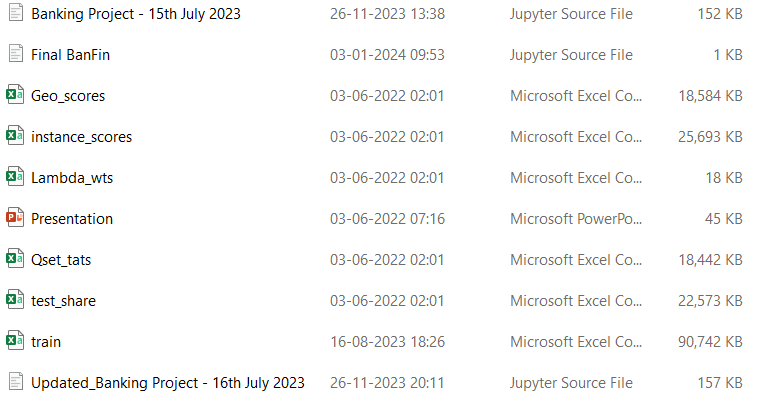

In [2]:
geo_scores = pd.read_csv("Geo_scores.csv")
instances = pd.read_csv("instance_scores.csv")
lambda_wts = pd.read_csv("Lambda_wts.csv")
qset_tats = pd.read_csv("Qset_tats.csv")
test = pd.read_csv("test_share.csv")
train = pd.read_csv("train.csv")

In [3]:
print(geo_scores.head(7))
print('***********'*10)
print(instances.head(7))
print('***********'*10)
print(lambda_wts.head(7))
print('***********'*10)
print(qset_tats.head(7))
print('***********'*10)
print(test.head(7))
print('***********'*10)
print(train.head(7))
print('***********'*10)

       id  geo_score
0   26674       4.48
1  204314       4.48
2  176521       5.17
3   48812      -2.41
4  126870       6.55
5  213392       6.55
6  136738      -0.34
**************************************************************************************************************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
2  161170             0.44
3  191161             0.76
4   34521            -0.84
5  115450             0.64
6  149830            -0.64
**************************************************************************************************************
     Group  lambda_wt
0   Grp936       3.41
1   Grp347      -2.88
2   Grp188       0.39
3  Grp1053      -2.75
4    Grp56      -0.83
5  Grp1168      -4.90
6   Grp221       1.08
**************************************************************************************************************
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
2   77525  

In [4]:
print(geo_scores.isnull().sum())
print("***********"*10)
print(instances.isnull().sum())
print("***********"*10)
print(lambda_wts.isnull().sum())
print("***********"*10)
print(qset_tats.isnull().sum())
print("***********"*10)
print(test.isnull().sum())
print("***********"*10)
print(train.isnull().sum())
print("***********"*10)

id               0
geo_score    71543
dtype: int64
**************************************************************************************************************
id                 0
instance_scores    0
dtype: int64
**************************************************************************************************************
Group        0
lambda_wt    0
dtype: int64
**************************************************************************************************************
id                           0
qsets_normalized_tat    103201
dtype: int64
**************************************************************************************************************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6        

In [5]:
print(geo_scores.isnull().sum()/len(geo_scores)*100)
print("****************"*10)
print(qset_tats.isnull().sum()/len(qset_tats)*100)

id           0.000000
geo_score    5.023964
dtype: float64
****************************************************************************************************************************************************************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


In [6]:
print(geo_scores.info())
print("************"*10)
print(qset_tats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None


In [7]:
print(geo_scores.describe())
print("**********"*10)
print(qset_tats.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01
****************************************************************************************************
                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


In [8]:
print(geo_scores.mean())
print("**********"*10)
print(qset_tats.mean())

id           142403.000000
geo_score        -0.000009
dtype: float64
****************************************************************************************************
id                      142403.000000
qsets_normalized_tat         0.000011
dtype: float64


In [9]:
print(geo_scores.median())
print("***********"*10)
print(qset_tats.median())

id           142403.00
geo_score         0.18
dtype: float64
**************************************************************************************************************
id                      142403.00
qsets_normalized_tat         0.02
dtype: float64


In [10]:
geo_scores.fillna(0.18, inplace=True)
qset_tats.fillna(0.02, inplace=True)

In [11]:
print(geo_scores.isnull().sum()/len(geo_scores)*100)
print("************"*10)
print(qset_tats.isnull().sum()/len(qset_tats)*100)

id           0.0
geo_score    0.0
dtype: float64
************************************************************************************************************************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64


In [12]:
print("geo_scores :", geo_scores['id'].nunique())
print("************"*10)
print("instances :",instances['id'].nunique())
print("************"*10)
print("lambda_wts :", lambda_wts["Group"].nunique())
print("************"*10)
print("qset_tats :", qset_tats['id'].nunique())
print("************"*10)
print("test id :",test['id'].nunique())
print("************"*10)
print("test Group:",test['Group'].nunique())
print("************"*10)
print("train id :", train['id'].nunique())
print("************"*10)
print("train Group :", train['Group'].nunique())

geo_scores : 284807
************************************************************************************************************************
instances : 284807
************************************************************************************************************************
lambda_wts : 1400
************************************************************************************************************************
qset_tats : 284807
************************************************************************************************************************
test id : 56962
************************************************************************************************************************
test Group: 915
************************************************************************************************************************
train id : 227845
************************************************************************************************************************
train Group : 1301


In [13]:
train['data'] = 'train'
test['data'] = 'test'

In [14]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,train


In [15]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [16]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'data'],
      dtype='object')

In [17]:
# append both train and test data together

all_data = pd.concat([train, test], axis=0)

In [18]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [19]:
all_data.isnull().sum()

id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target            56962
data                  0
dtype: int64

In [20]:
all_data['id'].nunique()

284807

In [21]:
print("geo_scores :", geo_scores['id'].nunique())
print("************"*10)
print("instances :",instances['id'].nunique())
print("************"*10)
print("lambda_wts :", lambda_wts["Group"].nunique())
print("************"*10)
print("qset_tats :", qset_tats['id'].nunique())

geo_scores : 284807
************************************************************************************************************************
instances : 284807
************************************************************************************************************************
lambda_wts : 1400
************************************************************************************************************************
qset_tats : 284807


In [22]:
print(geo_scores.max())
print("****************"*10)
print(instances.max())
print("****************"*10)
print(qset_tats.max())

id           284806.00
geo_score        45.81
dtype: float64
****************************************************************************************************************************************************************
id                 284806.00
instance_scores       120.35
dtype: float64
****************************************************************************************************************************************************************
id                      284806.0
qsets_normalized_tat        61.1
dtype: float64


In [23]:
geo_scores = geo_scores.groupby('id').mean()

In [24]:
instance = instances.groupby('id').mean()

In [25]:
qset_tats = qset_tats.groupby('id').mean()

In [26]:
print("geo_scores :", geo_scores.shape)
print("************"*10)
print("instance :",instances.shape)
print("************"*10)
print("lambda_wts :", lambda_wts.shape)
print("************"*10)
print("qset_tats :", qset_tats.shape)

geo_scores : (284807, 1)
************************************************************************************************************************
instance : (1424035, 2)
************************************************************************************************************************
lambda_wts : (1400, 2)
************************************************************************************************************************
qset_tats : (284807, 1)


In [27]:
geo_scores.head()

,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540


In [28]:
# append geo_scores , instance and qset_tats with all_dataset

all_data = pd.merge(all_data, geo_scores , on='id', how='left')

In [29]:
all_data = pd.merge(all_data, instances , on='id', how='left')

In [30]:
all_data = pd.merge(all_data, qset_tats , on='id', how='left')

In [31]:
all_data['Group'].nunique()

1400

In [32]:
lambda_wts['Group'].nunique()

1400

In [33]:
all_data = pd.merge(all_data, lambda_wts , on='Group', how='left')

In [34]:
# Split train and test data seperately

train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [35]:
print(train.shape)
print()
print(test.shape)

(1139225, 33)

(284810, 33)


In [36]:
test = test.drop(['id', 'Group','Target', 'data'], axis=1)

In [37]:
# split the data into independent and dependent variable 

X = train.drop(['id', 'Group','Target', 'data'], axis=1)
y = train[['Target']]

In [38]:
smote = SMOTE(random_state=42, sampling_strategy=0.75)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [40]:
standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

X_standardized = standard_scaler.fit_transform(X)

In [41]:
#model training and prediction

models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("NB", GaussianNB()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s Accuracy: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    # Calculating training accuracy
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy for {name}: {train_accuracy}")
    print()

    # Calculating test accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {name}: {test_accuracy}")

    # Calculating additional metrics
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}")
    print()
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print()
    print(f"Recall for {name}: {recall_score(y_test, y_pred)}")
    print()
    print(f"Precision for {name}: {precision_score(y_test, y_pred)}")
    print()
    print(f"ROC AUC for {name}: {roc_auc_score(y_test, y_pred)}")
    print("----------------------------------------------------------------------------")

LR Accuracy: 0.945489 (0.000573)
Training Accuracy for LR: 0.9454739359710983

Test Accuracy for LR: 0.9456612400763742
Confusion Matrix for LR:
[[222991   4460]
 [ 17169 153420]]

Classification Report for LR:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95    227451
         1.0       0.97      0.90      0.93    170589

    accuracy                           0.95    398040
   macro avg       0.95      0.94      0.94    398040
weighted avg       0.95      0.95      0.95    398040


Recall for LR: 0.8993545891001178

Precision for LR: 0.971750696731695

ROC AUC for LR: 0.9398729850504304
----------------------------------------------------------------------------
LDA Accuracy: 0.916999 (0.000702)
Training Accuracy for LDA: 0.9169434402156572

Test Accuracy for LDA: 0.9175032660034167
Confusion Matrix for LDA:
[[225416   2035]
 [ 30802 139787]]

Classification Report for LDA:
              precision    recall  f1-score   support

      